### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [347]:
import pandas as pd
import numpy as np
import ast
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [348]:
#Read data into Jupyter notebook, use pandas to import data into a data frame

In [349]:
data = pd.read_csv("data.csv")

In [350]:
#Preprocess data: Explore data

In [351]:
data.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0


In [352]:
data.head(5)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [353]:
data.shape

(20000, 22)

In [354]:
list(data)

['channelGrouping',
 'customDimensions',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'hits',
 'socialEngagementType',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'totals_bounces',
 'totals_hits',
 'totals_newVisits',
 'totals_pageviews',
 'totals_sessionQualityDim',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_transactionRevenue',
 'totals_transactions',
 'totals_visits']

In [355]:
#check for missing data

In [356]:
data.isnull().sum()

channelGrouping                       0
customDimensions                      0
date                                  0
device                                0
fullVisitorId                         0
geoNetwork                            0
hits                                  0
socialEngagementType                  0
trafficSource                         0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue    19807
totals_transactionRevenue         19807
totals_transactions               19804
totals_visits                         0
dtype: int64

In [357]:
#A NaN transaction would be 0. if the transaction is 0 the total revenue is also 0.
#type(data.iloc[0].totals_totalTransactionRevenue)
data['totals_totalTransactionRevenue'] = data['totals_totalTransactionRevenue'].fillna(0)
data['totals_transactionRevenue'] = data['totals_transactionRevenue'].fillna(0)
data['totals_transactions'] = data['totals_transactions'].fillna(0)

In [359]:
data.isnull().sum()

channelGrouping                       0
customDimensions                      0
date                                  0
device                                0
fullVisitorId                         0
geoNetwork                            0
hits                                  0
socialEngagementType                  0
trafficSource                         0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue        0
totals_transactionRevenue             0
totals_transactions                   0
totals_visits                         0
dtype: int64

In [360]:
payingCustomers.shape

(193, 22)

In [361]:
#Columns that are not populated in the Demo Data Set
#Device (we can drop a large part of this dictionary)
#geoNetwork (We can drop part of this dictionary)
#traffic source (also has some missing values)

In [362]:
def string_to_dict(dict_string):
    # Convert to proper json format
    #dict_string = dict_string.replace(" True", ' "True"').replace(" False", ' "False"').replace("{'", '{"').replace("'}", '"}').replace("':", '":').replace(" '", ' "').replace("',", '",')
    # Use Json to convert string to dictionary
    return json.loads(dict_string)

In [363]:
def string_to_dict_simple(dict_string):
    return ast.literal_eval(dict_string)

In [364]:
#This column doesn't seem to provide much value. I'll be dropping it.

customDimensionsData = data['customDimensions'].apply(string_to_dict_simple)
customDimensionsDataFrame = pd.DataFrame(list(customDimensionsData))

customDimensionsDataFrame.head()

,0
0,"{'index': '4', 'value': 'EMEA'}"
1,"{'index': '4', 'value': 'North America'}"
2,"{'index': '4', 'value': 'North America'}"
3,"{'index': '4', 'value': 'EMEA'}"
4,"{'index': '4', 'value': 'Central America'}"


In [365]:
deviceData = data['device'].apply(string_to_dict_simple)
deviceDataFrame = pd.DataFrame(list(deviceData))

deviceDataFrame.head()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [366]:
geoData = data['geoNetwork'].apply(string_to_dict_simple)
geoDataFrame = pd.DataFrame(list(geoData))

geoDataFrame.head()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America
2,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,Northern America
3,not available in demo dataset,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Western Asia
4,not available in demo dataset,not available in demo dataset,Americas,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,not available in demo dataset,Central America


In [367]:
#I have no idea what to do with this information... it's so much and so nested. I'll be dropping this column.

print(data['hits'][1])
#hitsData = data['hits'].apply(string_to_dict_simple)
#hitsDataFrame = pd.DataFrame(list(hitsData))

#hitsDataFrame.head()

[{'hitNumber': '1', 'time': '0', 'hour': '10', 'minute': '51', 'isInteraction': True, 'isEntrance': True, 'referer': 'https://sites.google.com/a/google.com/transportation/mtv-services/bikes/bike2workmay2016', 'page': {'pagePath': '/home', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle': 'Home', 'searchKeyword': 'jersey', 'searchCategory': '(not set)', 'pagePathLevel1': '/home', 'pagePathLevel2': '', 'pagePathLevel3': '', 'pagePathLevel4': ''}, 'appInfo': {'screenName': 'shop.googlemerchandisestore.com/home', 'landingScreenName': 'shop.googlemerchandisestore.com/home', 'exitScreenName': 'shop.googlemerchandisestore.com/asearch.html', 'screenDepth': '0'}, 'exceptionInfo': {'isFatal': True}, 'product': [], 'promotion': [{'promoId': 'Apparel Row 1', 'promoName': 'Apparel', 'promoCreative': 'home_main_link_apparel.jpg', 'promoPosition': 'Row 1'}, {'promoId': 'Backpacks Row 2 Combo', 'promoName': 'Backpacks', 'promoCreative': 'home_bags_google_2.jpg', 'promoPosition': 'Row 2 Combo

In [368]:
#Based on the output information i'll be dropping adwordsClickInfo

trafficSourceData = data['trafficSource'].apply(string_to_dict_simple)
trafficSourceDataFrame = pd.DataFrame(list(trafficSourceData))
trafficSourceDataFrame.drop(columns=['adwordsClickInfo'], inplace=True)
trafficSourceDataFrame.head()

,adContent,campaign,isTrueDirect,keyword,medium,referralPath,source
0,NaN,(not set),NaN,water bottle,organic,NaN,google
1,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,NaN,(not set),True,NaN,(none),NaN,(direct)
3,NaN,(not set),NaN,(not provided),organic,NaN,google
4,NaN,(not set),NaN,(not provided),organic,NaN,google


In [369]:
#Drop dictionary columns
data.drop(columns=['customDimensions','hits','trafficSource','device','geoNetwork'], inplace=True)
data.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,2.0,2.0,28.0,0.0,0.0,0.0,1
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,2.0,1.0,38.0,0.0,0.0,0.0,1
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,2.0,1.0,52.0,0.0,0.0,0.0,1


In [370]:
#Add new dictionary based dataframes to parent dataframe
newData = pd.concat([data, deviceDataFrame, geoDataFrame, trafficSourceDataFrame], axis=1)

In [371]:
newData = newData.replace('not available in demo dataset', np.nan, regex=True)
newData.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,networkLocation,region,subContinent,adContent,campaign,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,NaN,NaN,Western Europe,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,...,NaN,California,Northern America,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,...,NaN,NaN,Northern America,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,...,NaN,NaN,Western Asia,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,...,NaN,NaN,Central America,NaN,(not set),NaN,(not provided),organic,NaN,google


In [373]:
newData.iloc[0]

channelGrouping                         Organic Search
date                                          20171016
fullVisitorId                      3162355547410993243
socialEngagementType              Not Socially Engaged
visitId                                     1508198450
visitNumber                                          1
visitStartTime                              1508198450
totals_bounces                                       1
totals_hits                                          1
totals_newVisits                                     1
totals_pageviews                                     1
totals_sessionQualityDim                             1
totals_timeOnSite                                  NaN
totals_totalTransactionRevenue                       0
totals_transactionRevenue                            0
totals_transactions                                  0
totals_visits                                        1
browser                                        Firefox
browserSiz

In [374]:
#search for more missing data. Due to the high volume of misses let's drop totals_timeOnSite and totals_newVisits
null_counts = newData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
channelGrouping                       0
date                                  0
fullVisitorId                         0
socialEngagementType                  0
visitId                               0
visitNumber                           0
visitStartTime                        0
totals_bounces                    10127
totals_hits                           0
totals_newVisits                   4912
totals_pageviews                      1
totals_sessionQualityDim          10880
totals_timeOnSite                  9899
totals_totalTransactionRevenue        0
totals_transactionRevenue             0
totals_transactions                   0
totals_visits                         0
browser                               0
browserSize                       20000
browserVersion                    20000
deviceCategory                        0
flashVersion                      20000
isMobile                              0
language                          20000
mo

In [375]:
#Drop any columns with more that 50% missing values as they will not be useful
half_count = len(newData) / 2
newData = newData.dropna(thresh=half_count,axis=1)

In [376]:
print(newData.shape[0])
print(newData.columns.tolist())

20000
['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_timeOnSite', 'totals_totalTransactionRevenue', 'totals_transactionRevenue', 'totals_transactions', 'totals_visits', 'browser', 'deviceCategory', 'isMobile', 'operatingSystem', 'continent', 'country', 'networkDomain', 'subContinent', 'campaign', 'medium', 'source']


In [377]:
newData.iloc[0]

channelGrouping                         Organic Search
date                                          20171016
fullVisitorId                      3162355547410993243
socialEngagementType              Not Socially Engaged
visitId                                     1508198450
visitNumber                                          1
visitStartTime                              1508198450
totals_hits                                          1
totals_newVisits                                     1
totals_pageviews                                     1
totals_timeOnSite                                  NaN
totals_totalTransactionRevenue                       0
totals_transactionRevenue                            0
totals_transactions                                  0
totals_visits                                        1
browser                                        Firefox
deviceCategory                                 desktop
isMobile                                         False
operatingS

In [378]:
#There is only one value in this column. Let's drop it
newData["socialEngagementType"].unique()

array(['Not Socially Engaged'], dtype=object)

In [379]:
#These values seem to be meaningless. Let's drop them
newData["networkDomain"].unique()

array(['(not set)', 'windjammercable.net', 'unknown.unknown', ...,
       'unl.edu.ec', 'unknown.se', 'alltele.net'], dtype=object)

In [380]:
#I don't know how to read these values. Let's drop them
newData["campaign"].unique()

array(['(not set)', '"google + redesign/Accessories March 17" All Users',
       'AW - Dynamic Search Ads Whole Site',
       '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS',
       'Data Share Promo',
       'Page: contains "/google+redesign/bags" All Users',
       '1000557 | GA | US | en | Hybrid | GDN Remarketing',
       'Page: contains "/google+redesign/office"',
       'Page: contains "/google+redesign/drinkware"',
       'Page: contains "/google+redesign/bags" 1 Day', 'AW - Electronics',
       'AW - Accessories', 'Smart Display Campaign',
       '"google + redesign/Accessories March 17" All Users Similar Audiences',
       'Page: contains "/google+redesign/drinkware" Similar Audiences',
       'Run of Network Line Item', 'Technology/Technophiles'],
      dtype=object)

In [381]:
#search for more missing data. Due to the high volume of misses let's drop totals_timeOnSite and totals_newVisits
null_counts = newData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
channelGrouping                      0
date                                 0
fullVisitorId                        0
socialEngagementType                 0
visitId                              0
visitNumber                          0
visitStartTime                       0
totals_hits                          0
totals_newVisits                  4912
totals_pageviews                     1
totals_timeOnSite                 9899
totals_totalTransactionRevenue       0
totals_transactionRevenue            0
totals_transactions                  0
totals_visits                        0
browser                              0
deviceCategory                       0
isMobile                             0
operatingSystem                      0
continent                            0
country                              0
networkDomain                        0
subContinent                         0
campaign                             0
medium                    

In [407]:
newData.totals_pageviews.value_counts()

1.0      9918
2.0      2627
3.0      1686
4.0      1045
5.0       789
6.0       649
7.0       528
8.0       431
9.0       355
10.0      263
11.0      220
12.0      185
14.0      138
13.0      132
15.0      119
17.0      101
16.0       99
18.0       75
19.0       62
21.0       50
20.0       50
22.0       42
24.0       42
23.0       40
26.0       33
25.0       32
27.0       25
28.0       22
32.0       19
30.0       18
         ... 
71.0        3
52.0        3
59.0        3
60.0        2
68.0        2
47.0        2
50.0        2
98.0        2
82.0        2
65.0        2
56.0        2
53.0        1
90.0        1
111.0       1
100.0       1
62.0        1
85.0        1
165.0       1
74.0        1
112.0       1
54.0        1
58.0        1
84.0        1
92.0        1
63.0        1
79.0        1
138.0       1
115.0       1
61.0        1
69.0        1
Name: totals_pageviews, Length: 80, dtype: int64

In [416]:
newData[newData['totals_pageviews'].isnull()]

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,...,source_search.mysearch.com,source_siliconvalley.about.com,source_sites.google.com,source_support.google.com,source_t.co,source_web.skype.com,source_web.whatsapp.com,source_yahoo,source_yandex,source_youtube.com


In [414]:
newData['totals_pageviews'] = data['totals_pageviews'].fillna(1)

In [382]:
drop_cols = ['socialEngagementType','networkDomain','campaign','totals_newVisits','totals_timeOnSite']

In [383]:
newData = newData.drop(drop_cols,axis=1)

In [384]:
newData.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_totalTransactionRevenue,totals_transactionRevenue,...,totals_visits,browser,deviceCategory,isMobile,operatingSystem,continent,country,subContinent,medium,source
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,1,1.0,0.0,0.0,...,1,Firefox,desktop,False,Windows,Europe,Germany,Western Europe,organic,google
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Chrome OS,Americas,United States,Northern America,referral,sites.google.com
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,2,2.0,0.0,0.0,...,1,Chrome,mobile,True,Android,Americas,United States,Northern America,(none),(direct)
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Windows,Asia,Turkey,Western Asia,organic,google
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,2,2.0,0.0,0.0,...,1,Chrome,desktop,False,Windows,Americas,Mexico,Central America,organic,google


In [385]:
#Feature Engineering
#Convert Categorical Columns to Numeric Features

In [386]:
nominal_columns = ["channelGrouping","browser","deviceCategory","isMobile","operatingSystem","continent","country","subContinent","medium","source"]
dummy_df = pd.get_dummies(newData[nominal_columns])
newData = pd.concat([newData, dummy_df], axis=1)
newData = newData.drop(nominal_columns, axis=1)


In [387]:
newData.head()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_hits,totals_pageviews,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,...,source_search.mysearch.com,source_siliconvalley.about.com,source_sites.google.com,source_support.google.com,source_t.co,source_web.skype.com,source_web.whatsapp.com,source_yahoo,source_yandex,source_youtube.com
0,20171016,3162355547410993243,1508198450,1,1508198450,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20171016,8934116514970143966,1508176307,6,1508176307,2,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,20171016,7992466427990357681,1508201613,1,1508201613,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,20171016,9075655783635761930,1508169851,1,1508169851,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20171016,6960673291025684308,1508190552,1,1508190552,2,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [388]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 329 entries, date to source_youtube.com
dtypes: float64(4), int64(6), uint64(1), uint8(318)
memory usage: 7.7 MB


In [389]:
newData.iloc[0]

date                                 2.017102e+07
fullVisitorId                        3.162356e+18
visitId                              1.508198e+09
visitNumber                          1.000000e+00
visitStartTime                       1.508198e+09
totals_hits                          1.000000e+00
totals_pageviews                     1.000000e+00
totals_totalTransactionRevenue       0.000000e+00
totals_transactionRevenue            0.000000e+00
totals_transactions                  0.000000e+00
totals_visits                        1.000000e+00
channelGrouping_Affiliates           0.000000e+00
channelGrouping_Direct               0.000000e+00
channelGrouping_Display              0.000000e+00
channelGrouping_Organic Search       1.000000e+00
channelGrouping_Paid Search          0.000000e+00
channelGrouping_Referral             0.000000e+00
channelGrouping_Social               0.000000e+00
browser_ADM                          0.000000e+00
browser_Amazon Silk                  0.000000e+00


In [390]:
salesData = 0
salesData = newData[newData.totals_totalTransactionRevenue > 0] 

In [391]:
salesData.iloc[0].date

20171016.0

In [392]:
salesData.shape

(193, 329)

In [393]:
salesData['date'] =  pd.to_datetime(salesData['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d");

#salesData['column_name'].map('{:,.2f}'.format)

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [394]:
salesData.shape

(193, 329)

<BarContainer object of 193 artists>

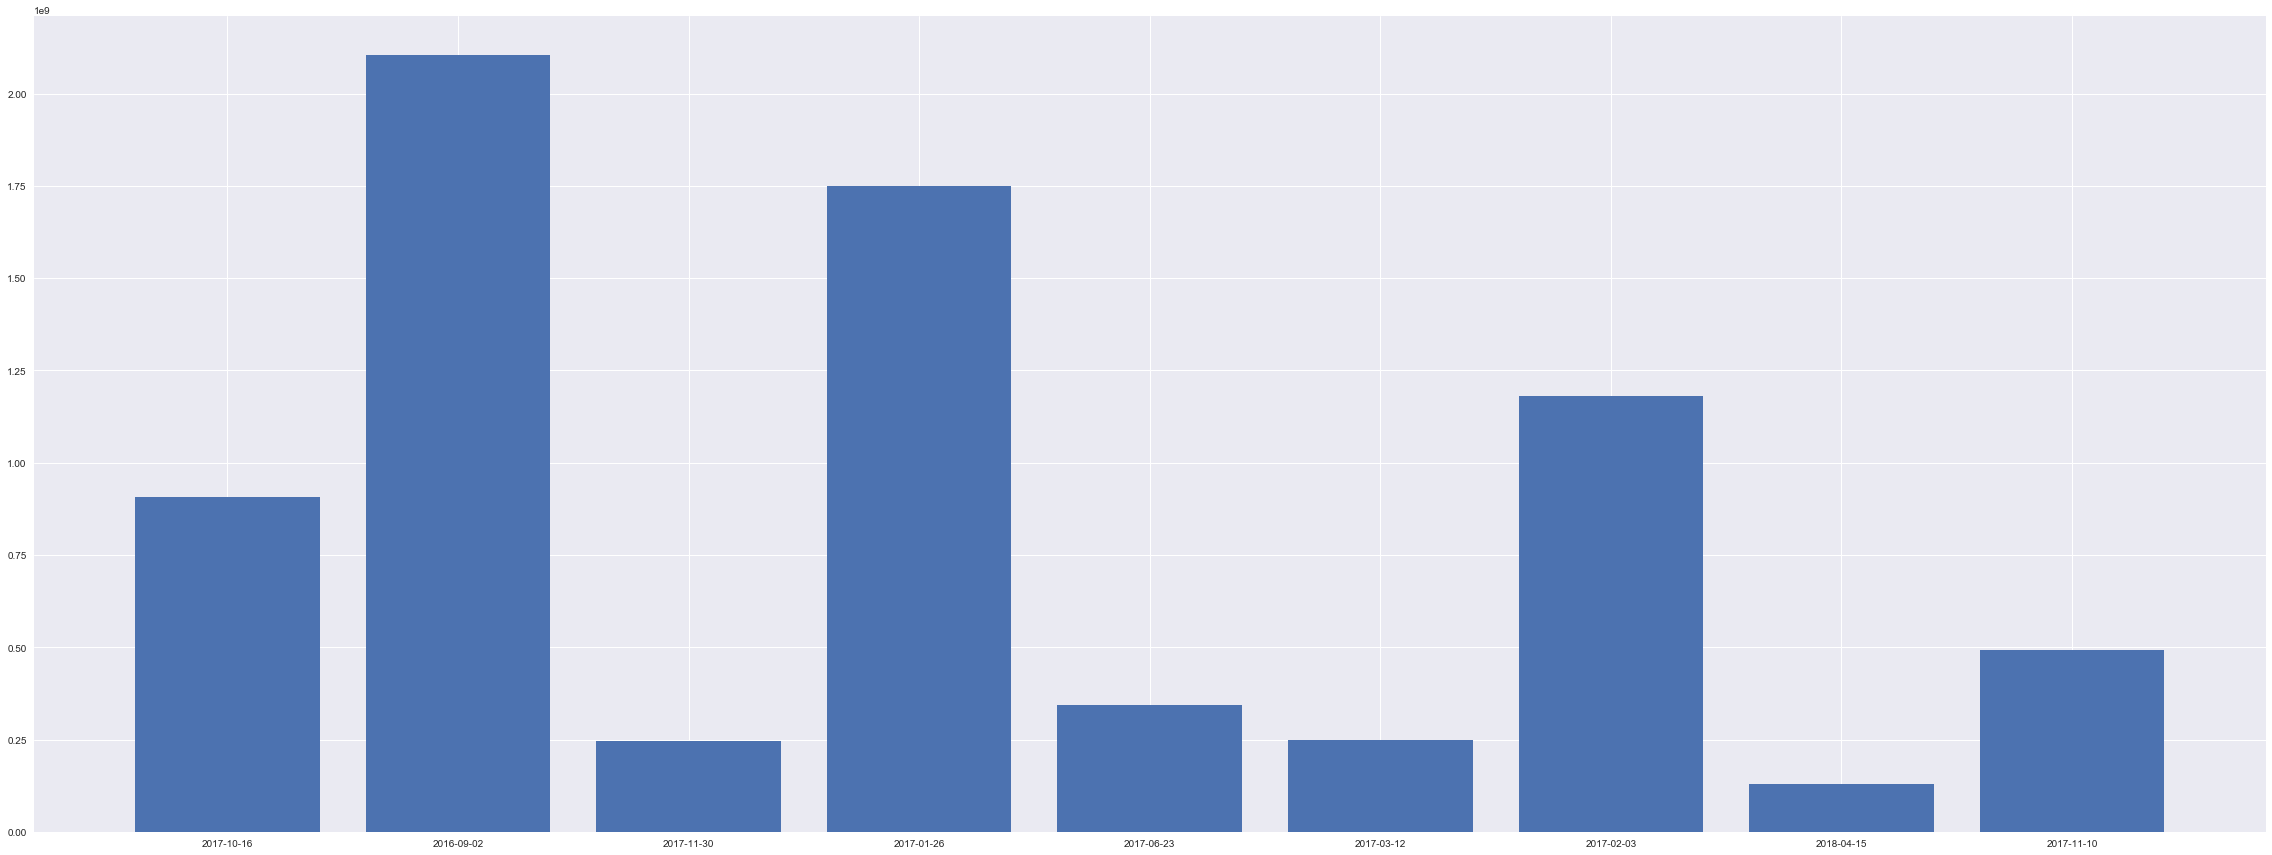

In [396]:
fix, ax = plt.subplots(figsize=(40,15))

plt.bar(salesData['date'], salesData['totals_totalTransactionRevenue'])

In [397]:
salesData["date"].unique()

array(['2017-10-16', '2016-09-02', '2017-11-30', '2017-01-26',
       '2017-06-23', '2017-03-12', '2017-02-03', '2018-04-15',
       '2017-11-10'], dtype=object)

In [398]:
data["date"].unique()

array([20171016, 20160902, 20171130, 20170126, 20170623, 20170312,
       20170203, 20180415, 20171110], dtype=int64)

In [399]:
#So it looks like we only have data for 9 days. I don't think date matters.

In [26]:
#Apply data scaling. Justify the type of scaling used.

In [401]:
#Predict the **total transaction revenue**. 

#- Split dataset into train and test dataset. 
#- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
#- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
#- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
#- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 


In [402]:
# Decide aboute a good evaluation strategy and justify your choice.
#I will use a simple linear regression to relate device and geographic location information to sales

In [417]:
X = newData.drop(['totals_totalTransactionRevenue'], axis=1).values
y = newData.totals_totalTransactionRevenue.values

In [418]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv

In [419]:
lr = LinearRegression()
kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores = cv.cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.84 (+/- 0.14)
